# Predicting Real Estate House Prices

---

***By Nichapat (Pat) Boonprasertsri***

---



### Dataset: Real estate.csv

### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [ ]:
real_estate_data = pd.read_csv('Real estate.csv')
real_estate_data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [ ]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [ ]:
real_estate_data.shape

(414, 8)

### Available features in the dataset

In [ ]:
real_estate_data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [ ]:
real_estate_data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [ ]:
X = real_estate_data.loc[:'No',:'X6 longitude']
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [ ]:
y = real_estate_data['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=8
                                                    )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(289, 7)
(125, 7)
(289,)
(125,)


### Choose the model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [ ]:
model = LinearRegression()

### Train the model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([30.09197542, 11.36526299, 39.98668044, 44.6922875 , 34.83268249,
       43.9984959 , 45.25135463, 16.86108533, 17.13391917, 42.37900817,
       48.38385531, 30.96118889, 36.7471192 , 43.57739073, 46.76565726,
       25.29855908, 48.15055294, 50.15868323, 50.73194169, 51.79610781,
       48.82353251, 14.01140657, 26.47159915, 37.83327728, 47.06460963,
       36.25301377, 34.42194183,  9.31182573, 45.48980175, 43.97684735,
       43.84172189, 36.7031154 , 42.11760989, 16.40682542, 45.56630488,
       34.7419417 , 45.86668716, 33.35348509, 48.48837491, 45.82547448,
       47.58031125, 48.05334687, 35.98199054, 37.17169901, 31.4458441 ,
       48.32592666, 40.38536515, 38.4067284 , 49.11434003, 44.0978941 ,
       42.63922031, 39.30117324, 34.65718725, 43.00344136, 37.82991177,
       34.38003756, 32.551947  , 33.30026879, 42.56486683, 53.68376792,
       12.84259016, 41.76151268, 35.78631797, 53.46472763, 13.28924715,
       35.45759282, 29.04876311, 13.83506243, 44.72040109, 42.72

### Display the coefficients

In [ ]:
model.coef_

array([-6.23107024e-03,  3.97123206e+00, -2.29828172e-01, -5.11321743e-03,
        1.07753771e+00,  1.69949292e+02, -1.87841398e+01])

### Find how well the trained model did with testing data

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2 Score : ", r2)

r2 Score :  0.6653430182697455


### Plot House Age Vs Price

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

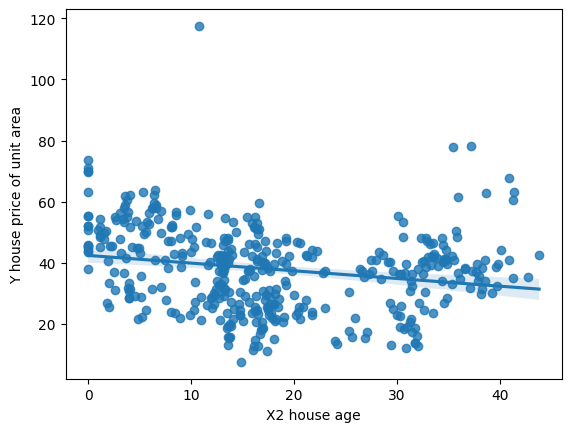

In [ ]:
sns.regplot(x='X2 house age', y='Y house price of unit area', data=real_estate_data)

### Plot Distance to MRT station Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

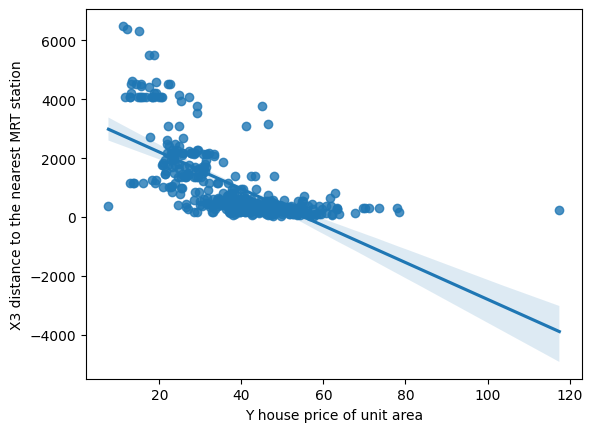

In [ ]:
sns.regplot(x='Y house price of unit area', y='X3 distance to the nearest MRT station', data=real_estate_data)

### Plot Number of Convienience Stores Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

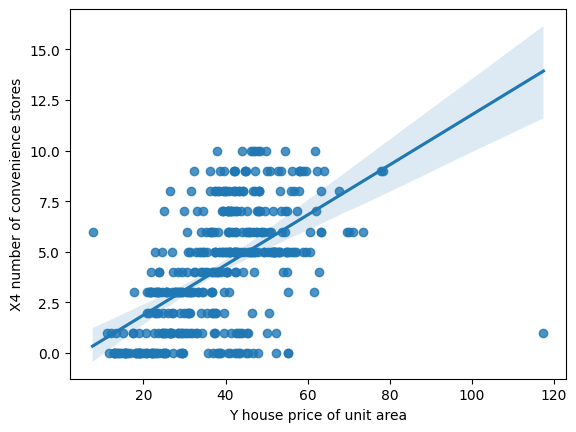

In [ ]:
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores', data=real_estate_data)